# Decision Tree

In [0]:
import warnings
warnings.filterwarnings("ignore")


import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
import pickle

from tqdm import tqdm
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import preprocessed data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
data=pd.read_csv('/content/drive/My Drive/ data_sets/preprocessed_data.csv')

In [0]:
#import data to append project titles
title_data=pd.read_csv("/content/drive/My Drive/ data_sets/train_data.csv")
title_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [0]:
#preprocessing project title 
# https://stackoverflow.com/a/47091490/4084039

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# Combining all the above stundents 
 
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        #sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        sent=' '.join(token.lower() for token in nltk.word_tokenize(sent) if token.lower() not in stopwords.words('english'))
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text
preprocessed_titles = preprocess_text(title_data['project_title'].values)

100%|██████████| 109248/109248 [01:21<00:00, 1345.69it/s]


In [0]:
#add project titles to preprocessed data
data['project_title']=preprocessed_titles

In [0]:
#save the concatinated data into drive
df=pd.DataFrame(data)
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

# 1. **Decision** **Tree**

# 1.1 Loading Data

In [3]:
data=pd.read_csv("/content/drive/My Drive/data.csv",nrows=40000)
data.head(2)

,Unnamed: 0,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,project_title
0,0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home
1,1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,wanted projector hungry learners


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,random_state=42)
print(X_train.shape)
print(X_test.shape)

(32000, 10)
(8000, 10)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#TfIdf of words of essay column
tfidf1 = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=20000)
tfidf1.fit(X_train['essay'].values)

# we use the fitted TfIdfVectoriser to convert the text to vector
X_train_essay_tfidf = tfidf1.transform(X_train['essay'].values)
X_test_essay_tfidf = tfidf1.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(32000, 20000) (32000,)
(8000, 20000) (8000,)


In [6]:
tfidf2 = TfidfVectorizer(min_df=10,ngram_range=(1,4))
tfidf2.fit(X_train['project_title'].values.astype('U'))

#x = v.fit_transform(df['Review'].values.astype('U'))
# we use the fitted TfIdfVectoriser to convert the text to vector
X_train_title_tfidf = tfidf2.transform(X_train['project_title'].values.astype('U'))
X_test_title_tfidf = tfidf2.transform(X_test['project_title'].values.astype('U'))

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(32000, 2352) (32000,)
(8000, 2352) (8000,)


In [0]:
#converting to word to vector
infile = open('/content/drive/My Drive/ data_sets/glove_vectors','rb')
model = pickle.load(infile)
glove_words =  set(model.keys())

In [0]:
#create dictionary of words using essay train
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_essay = set(tfidf_model.get_feature_names())

In [9]:
#tfidf vector representation of train essay 
# compute tfidf word2vec for each review.
tfidf_essay_w2v_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_essay_w2v_tr.append(vector)
print('\n')
print(len(tfidf_essay_w2v_tr))
print(len(tfidf_essay_w2v_tr[0]))

100%|██████████| 32000/32000 [01:06<00:00, 482.39it/s]



32000
300


In [10]:
#tfidf vector representation of test essay 
# compute tfidf word2vec for each review.
tfidf_essay_w2v_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_essay_w2v_te.append(vector)
print('\n')
print(len(tfidf_essay_w2v_te))
print(len(tfidf_essay_w2v_te[0]))

100%|██████████| 8000/8000 [00:16<00:00, 475.82it/s]



8000
300


In [0]:
#create dictionary of words using title train
tfidf_model1 = TfidfVectorizer()
tfidf_model1.fit(X_train['project_title'].astype('U'))
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model1.get_feature_names(), list(tfidf_model1.idf_)))
tfidf_words_title = set(tfidf_model1.get_feature_names())

In [12]:
#tfidf vector representation of test title
# compute tfidf word2vec for each review.
tfidf_title_w2v_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in str(sentence).split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_tr.append(vector)

print('\n')
print(len(tfidf_title_w2v_tr))
print(len(tfidf_title_w2v_tr[0]))

100%|██████████| 32000/32000 [00:01<00:00, 29993.83it/s]



32000
300


In [13]:
#tfidf vector representation of test title
# compute tfidf word2vec for each review.
tfidf_title_w2v_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in str(sentence).split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_te.append(vector)

print('\n')
print(len(tfidf_title_w2v_te))
print(len(tfidf_title_w2v_te[0]))

100%|██████████| 8000/8000 [00:00<00:00, 33646.83it/s]



8000
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#one hotencoding on teacher prefix
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train['teacher_prefix'].values.reshape(-1,1))

X_train_teacher_ohe = enc.transform(X_train['teacher_prefix'].values.reshape(-1,1))
X_test_teacher_ohe = enc.transform(X_test['teacher_prefix'].values.reshape(-1,1))


#one hot encoding on school state
enc1 = OneHotEncoder(handle_unknown='ignore')
enc1.fit(X_train['school_state'].values.reshape(-1,1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = enc1.transform(X_train['school_state'].values.reshape(-1,1))
X_test_state_ohe = enc1.transform(X_test['school_state'].values.reshape(-1,1))


#one hot encoding of project grade category
enc2= OneHotEncoder(handle_unknown='ignore')
enc2.fit(X_train['project_grade_category'].values.reshape(-1,1))

X_train_grade = enc2.transform(X_train['project_grade_category'].values.reshape(-1,1))
X_test_grade = enc2.transform(X_test['project_grade_category'].values.reshape(-1,1))


#one hot encoding on clean categories
enc3= OneHotEncoder(handle_unknown='ignore')
enc3.fit(X_train['clean_categories'].values.reshape(-1,1))

X_train_categories = enc3.transform(X_train['clean_categories'].values.reshape(-1,1))
X_test_categories = enc3.transform(X_test['clean_categories'].values.reshape(-1,1))


In [0]:
#normalize number of previously posted projects of the project
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previous = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_previous = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

 

#normalize prize of the project
normalizer1 = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer1.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer1.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)

 

# Concatinating all the features

In [16]:
from scipy.sparse import hstack
#concatinate tfidf features
X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade, X_train_price_norm,X_train_previous,X_train_categories ,X_train_state_ohe)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf,X_test_title_tfidf,X_test_state_ohe, X_test_teacher_ohe, X_test_grade, X_test_price_norm,X_test_previous,X_test_categories,X_test_state_ohe)).tocsr()

print("Final TfIdf Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final TfIdf Data matrix
(32000, 22509) (32000,)
(8000, 22509) (8000,)


In [17]:
#concatinate word to vector  features
X_tr_w2v = hstack((tfidf_essay_w2v_tr,tfidf_title_w2v_tr, X_train_state_ohe, X_train_teacher_ohe, X_train_grade, X_train_price_norm,X_train_previous,X_train_categories ,X_train_state_ohe)).tocsr()
X_te_w2v = hstack((tfidf_essay_w2v_te,tfidf_title_w2v_te, X_test_state_ohe, X_test_teacher_ohe, X_test_grade, X_test_price_norm,X_test_previous,X_test_categories,X_test_state_ohe)).tocsr()
 
 
print("Final W2V Data matrix")
print(X_tr_w2v.shape, y_train.shape)
print(X_te_w2v.shape, y_test.shape)
print("="*100)

Final W2V Data matrix
(32000, 757) (32000,)
(8000, 757) (8000,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500]
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'min_samples_split':[5, 10, 100, 500],'max_depth':[1, 5, 10, 50]}
dt= DecisionTreeClassifier()

In [19]:
clf_t = GridSearchCV(dt, parameters,cv=5,scoring='roc_auc',return_train_score=True)
clf_t.fit(X_tr_tfidf,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

In [0]:
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def matrix(l):#function to prepare AUC matrix for plotting 
    a=[]
    for i in range(4):
        b=[]
        for j in range(i*4,(i+1)*4):
            b.append(l[j])
        a.append(b)
    return(a)

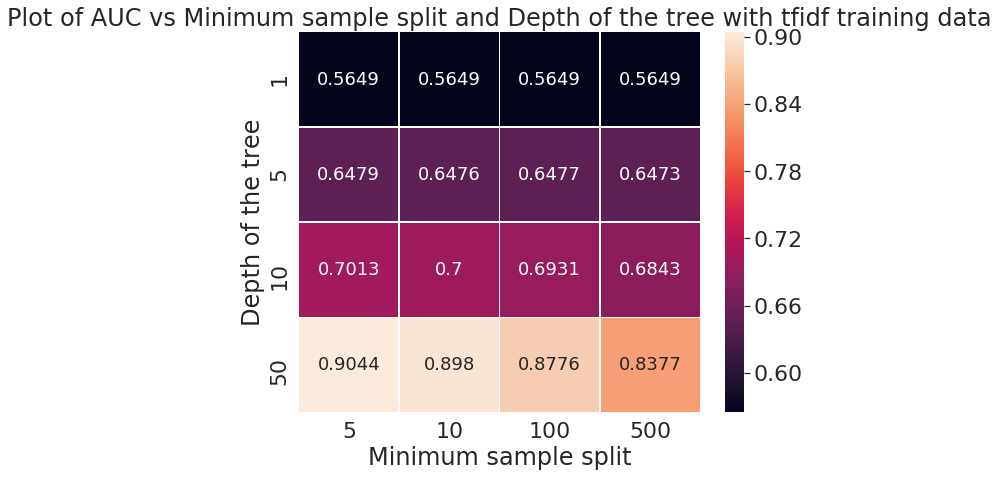

In [59]:
import seaborn as sns
df = pd.DataFrame(matrix(clf_t.cv_results_['mean_train_score']),parameters['max_depth'],parameters['min_samples_split'])
plt.figure(figsize=(9,7))
sns.set(font_scale=2) # for label size
sns.heatmap(df, annot=True, annot_kws={"size": 18,},fmt='.4g', linewidths=.3) # font size
plt.xlabel('Minimum sample split')
plt.ylabel('Depth of the tree')
plt.title('Plot of AUC vs Minimum sample split and Depth of the tree with tfidf training data')

plt.show()

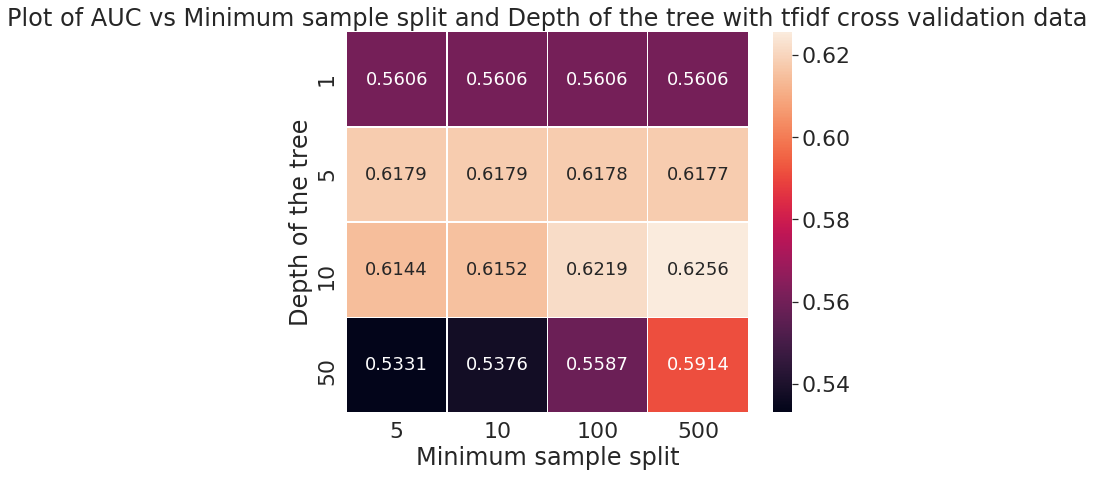

Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}


In [60]:
df= pd.DataFrame(matrix(clf_t.cv_results_['mean_test_score']),parameters['max_depth'],parameters['min_samples_split'])
plt.figure(figsize=(9,7))
sns.set(font_scale=2) # for label size
sns.heatmap(df, annot=True, annot_kws={"size": 18,},fmt='.4g', linewidths=.3) # font size
plt.xlabel('Minimum sample split')
plt.ylabel('Depth of the tree')
plt.title('Plot of AUC vs Minimum sample split and Depth of the tree with tfidf cross validation data')

plt.show()

print("Best Hyper parameters: ",clf_t.best_params_)

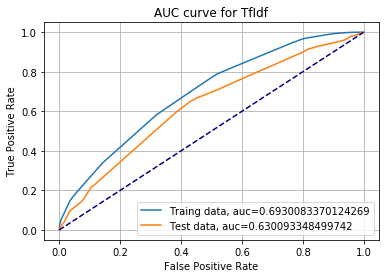

In [21]:
Tr_pred=[i[1] for i in clf_t.predict_proba(X_tr_tfidf)]
Test_pred=[i[1] for i in clf_t.predict_proba(X_te_tfidf)]

fpr, tpr, _ = metrics.roc_curve(y_train,  Tr_pred)
auc = metrics.roc_auc_score(y_train, Tr_pred)
plt.plot(fpr,tpr,label="Traing data, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  Test_pred)
auc_t = metrics.roc_auc_score(y_test, Test_pred)
plt.plot(fpr,tpr,label="Test data, auc="+str(auc_t))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for TfIdf')
plt.grid()
plt.legend()
plt.show()

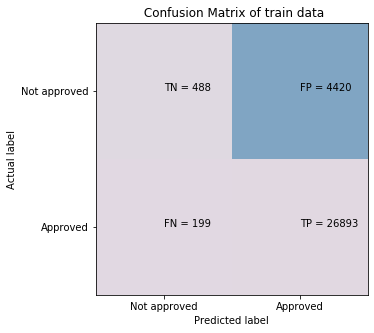

In [22]:
plt.figure(figsize=(10,5))
cm = confusion_matrix(y_train,clf_t.predict(X_tr_tfidf))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of train data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

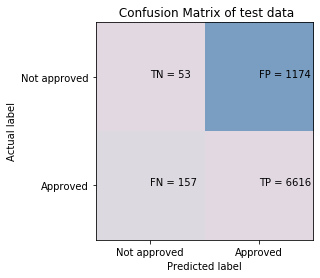

In [23]:
cm = confusion_matrix(y_test,clf_t.predict(X_te_tfidf))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [0]:
#False positive data  model
p=clf_t.predict(X_te_tfidf)
a=[i for i in range(len(p)) if(y_test[i]==0 and p[i]==1)]#indecies of False positive data

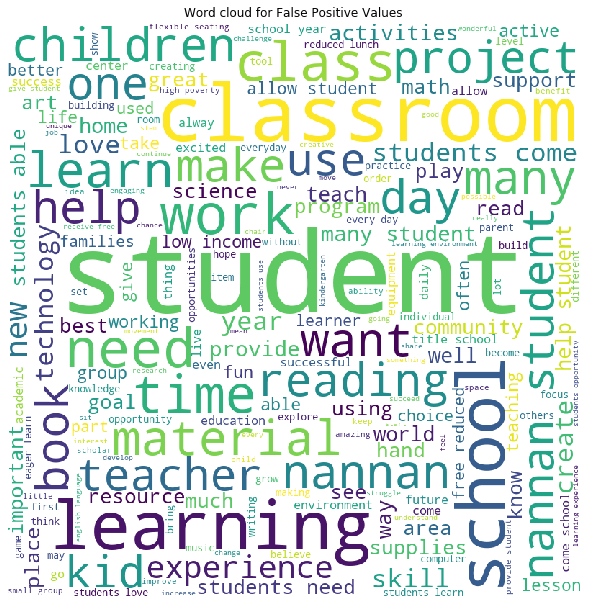

In [25]:
comment_words = ' '
# iterate through the csv file 
for val in X_test['essay'].iloc[a]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word cloud for False Positive Values ')
  
plt.show() 

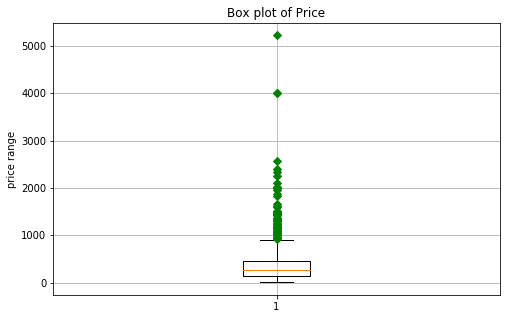

In [26]:
plt.figure(figsize=(8,5))
plt.boxplot(X_test['price'].iloc[a],0,'gD',)
plt.ylabel('price range')
plt.title('Box plot of Price')
plt.grid()

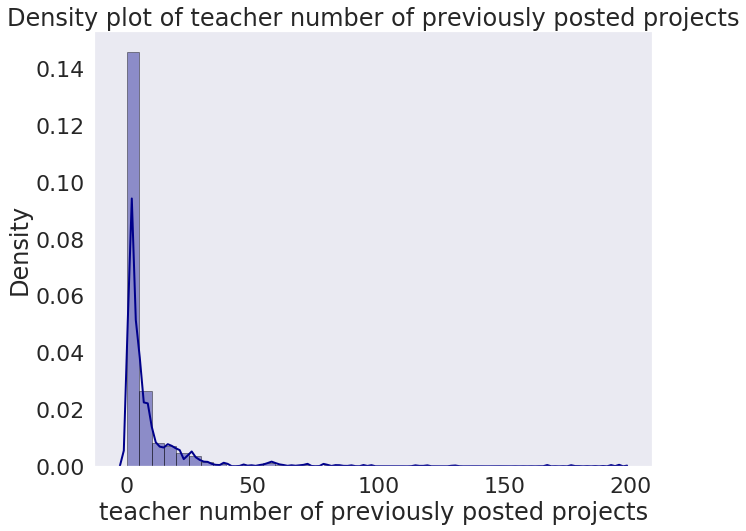

In [61]:
plt.figure(figsize=(10,8))
sns.distplot(X_test['teacher_number_of_previously_posted_projects'].iloc[a], hist=True, kde=True, 
             bins=int(200/5), color = 'darkblue', #each bin is of size 5
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.xlabel('teacher number of previously posted projects')
plt.ylabel('Density')
plt.title('Density plot of teacher number of previously posted projects')
plt.grid()

<h2>1.6 Getting top features using `feature_importances_`</h2>

In [27]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#train a Decision tree to get feature importance
clf_t1=DecisionTreeClassifier()
clf_t1.fit(X_tr_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
f=clf_t1.feature_importances_
c=[i for i in range(X_tr_tfidf.shape[1]) if abs(f[i])>0]#indecies of non zero features 
x1=X_tr_tfidf.toarray()
X_tr_tfidf_if=[i[c] for i in x1]#training data with important features

In [29]:
clf_t2= GridSearchCV(dt, parameters,cv=3,scoring='roc_auc',return_train_score=True)#new model with important features
clf_t2.fit(X_tr_tfidf_if,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

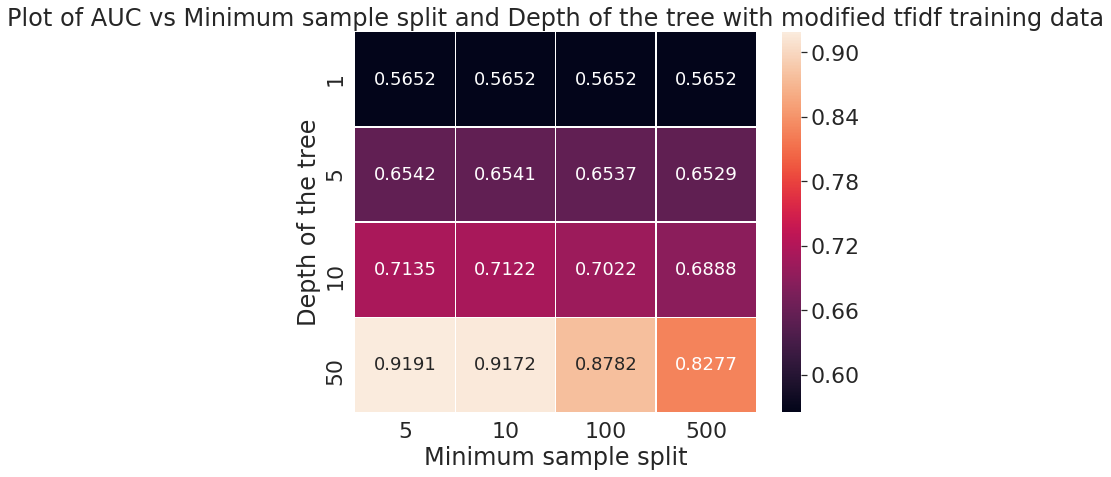

In [62]:
df = pd.DataFrame(matrix(clf_t2.cv_results_['mean_train_score']),parameters['max_depth'],parameters['min_samples_split'])
plt.figure(figsize=(9,7))
sns.set(font_scale=2) # for label size
sns.heatmap(df, annot=True, annot_kws={"size": 18,},fmt='.4g', linewidths=.3) # font size
plt.xlabel('Minimum sample split')
plt.ylabel('Depth of the tree')
plt.title('Plot of AUC vs Minimum sample split and Depth of the tree with modified tfidf training data')

plt.show()

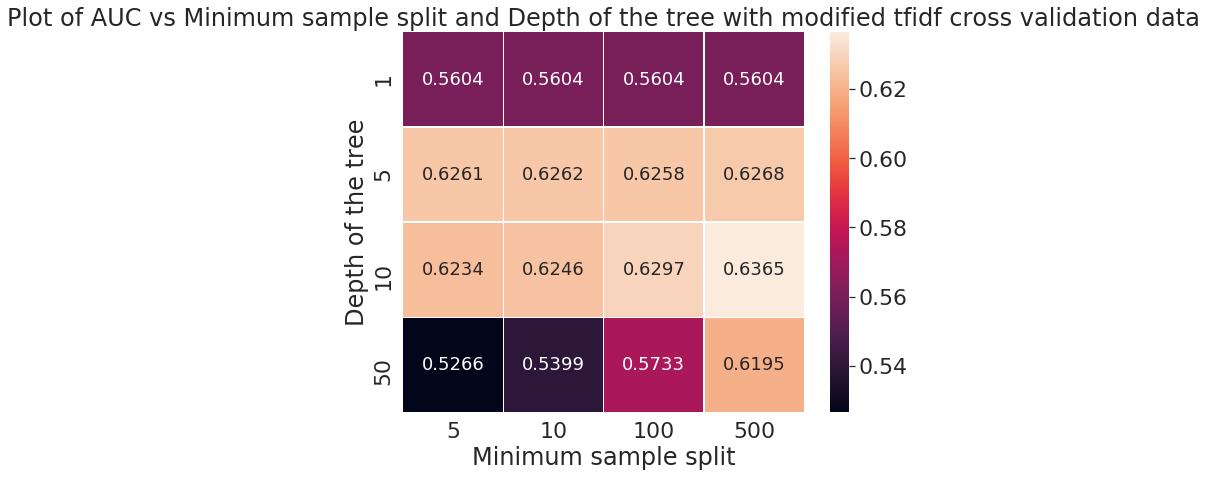

Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}


In [63]:
df = pd.DataFrame(matrix(clf_t2.cv_results_['mean_test_score']),parameters['max_depth'],parameters['min_samples_split'])
plt.figure(figsize=(9,7))
sns.set(font_scale=2) # for label size
sns.heatmap(df, annot=True, annot_kws={"size": 18,},fmt='.4g', linewidths=.3) # font size
plt.xlabel('Minimum sample split')
plt.ylabel('Depth of the tree')
plt.title('Plot of AUC vs Minimum sample split and Depth of the tree with modified tfidf cross validation data')

plt.show()

print("Best Hyper parameters: ",clf_t2.best_params_)

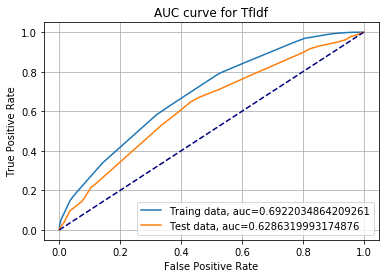

In [58]:
x1=X_te_tfidf.toarray()
X_te_tfidf_if=[i[c] for i in x1]#testing data with important features

Tr_pred=[i[1] for i in clf_t2.predict_proba(X_tr_tfidf_if)]
Test_pred=[i[1] for i in clf_t2.predict_proba(X_te_tfidf_if)]

fpr, tpr, _ = metrics.roc_curve(y_train,  Tr_pred)
auc = metrics.roc_auc_score(y_train, Tr_pred)
plt.plot(fpr,tpr,label="Traing data, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  Test_pred)
auc_tif= metrics.roc_auc_score(y_test, Test_pred)
plt.plot(fpr,tpr,label="Test data, auc="+str(auc_tif))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for TfIdf')
plt.legend()
plt.grid()
plt.show()

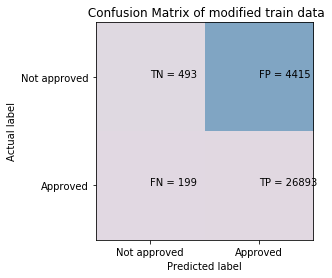

In [31]:
cm = confusion_matrix(y_train,clf_t2.predict(X_tr_tfidf_if))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of modified train data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

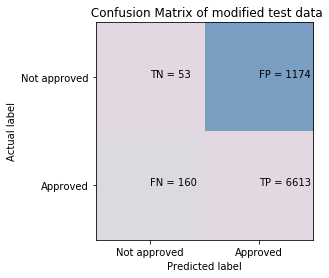

In [32]:
cm = confusion_matrix(y_test,clf_t2.predict(X_te_tfidf_if))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of modified test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Decision tree with Word To Vector 

In [33]:
clf_w = GridSearchCV(dt, parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf_w.fit(X_tr_w2v,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

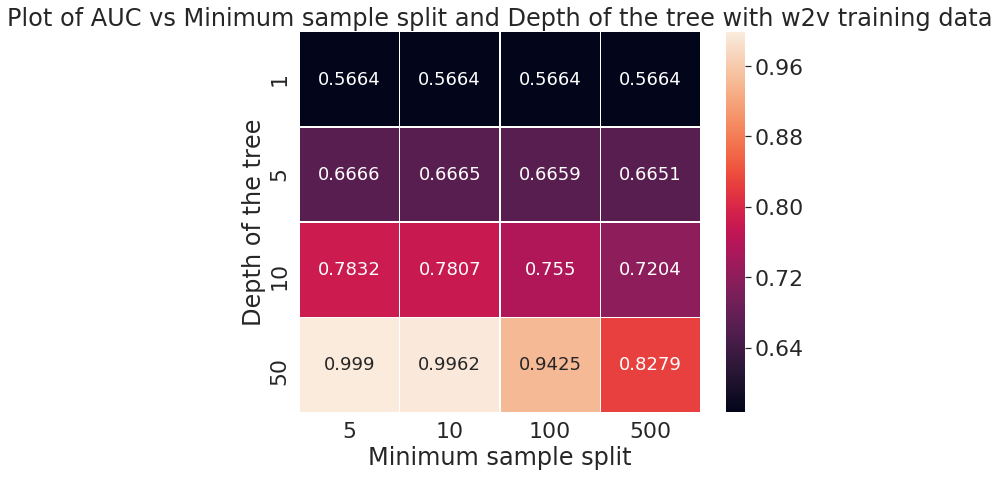

In [64]:
df= pd.DataFrame(matrix(clf_w.cv_results_['mean_train_score']),parameters['max_depth'],parameters['min_samples_split'])
plt.figure(figsize=(9,7))
sns.set(font_scale=2) # for label size
sns.heatmap(df, annot=True, annot_kws={"size": 18,},fmt='.4g', linewidths=.3) # font size
plt.xlabel('Minimum sample split')
plt.ylabel('Depth of the tree')
plt.title('Plot of AUC vs Minimum sample split and Depth of the tree with w2v training data')

plt.show()

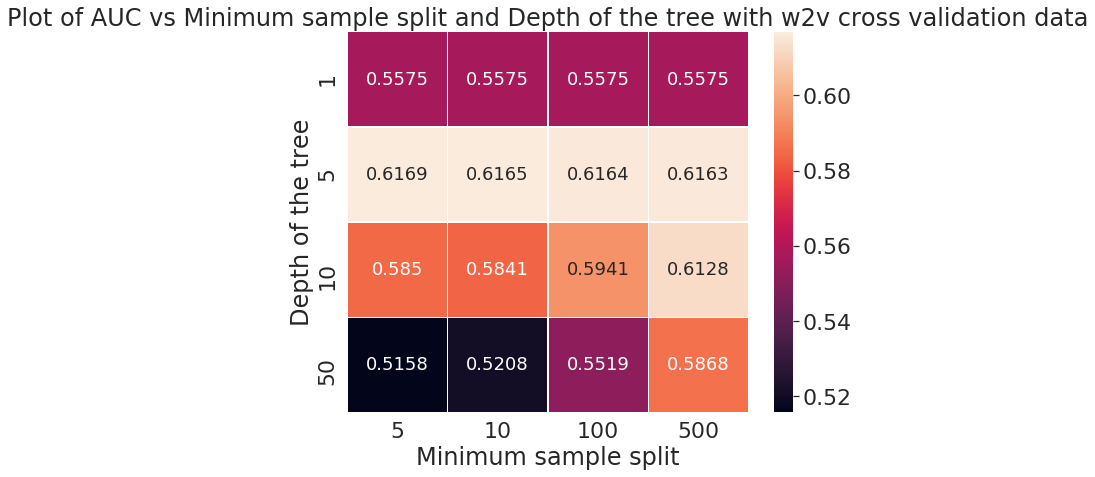

Best Hyper parameters:  {'max_depth': 5, 'min_samples_split': 5}


In [65]:
df= pd.DataFrame(matrix(clf_w.cv_results_['mean_test_score']),parameters['max_depth'],parameters['min_samples_split'])
plt.figure(figsize=(9,7))
sns.set(font_scale=2) # for label size
sns.heatmap(df, annot=True, annot_kws={"size": 18,},fmt='.4g', linewidths=.3) # font size
plt.xlabel('Minimum sample split')
plt.ylabel('Depth of the tree')
plt.title('Plot of AUC vs Minimum sample split and Depth of the tree with w2v cross validation data')

plt.show()

print("Best Hyper parameters: ",clf_w.best_params_)

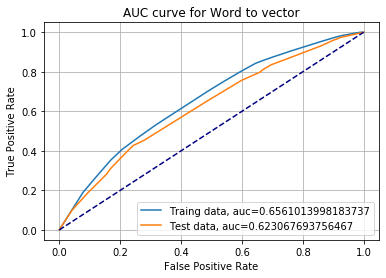

In [57]:
Tr_pred=[i[1] for i in clf_w.predict_proba(X_tr_w2v)]
Test_pred=[i[1] for i in clf_w.predict_proba(X_te_w2v)]

fpr, tpr, _ = metrics.roc_curve(y_train,  Tr_pred)
auc = metrics.roc_auc_score(y_train, Tr_pred)
plt.plot(fpr,tpr,label="Traing data, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  Test_pred)
auc_w = metrics.roc_auc_score(y_test, Test_pred)
plt.plot(fpr,tpr,label="Test data, auc="+str(auc_w))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for Word to vector')
plt.legend()
plt.grid()
plt.show()

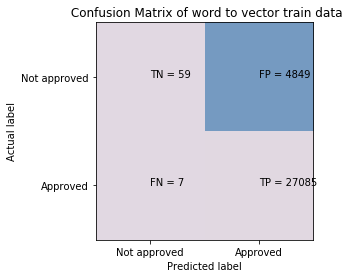

In [35]:
cm = confusion_matrix(y_train,clf_w.predict(X_tr_w2v))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of word to vector train data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

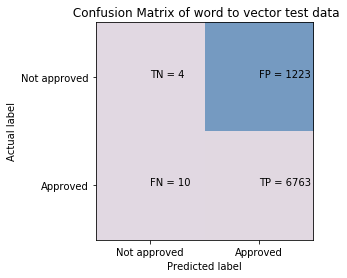

In [36]:
cm = confusion_matrix(y_test,clf_w.predict(X_te_w2v))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of word to vector test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [0]:
p=clf_w.predict(X_te_w2v)
a=[i for i in range(len(p)) if(y_test[i]==0 and p[i]==1)]#indecies of False positive data

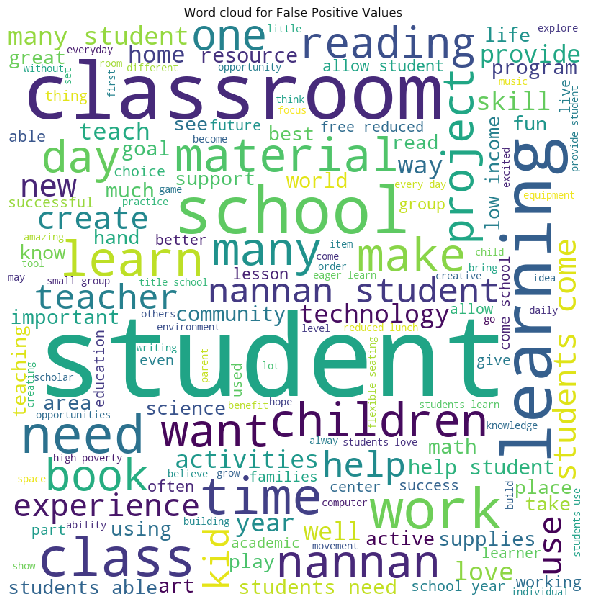

In [38]:
comment_words = ' '
# iterate through the csv file 
for val in X_test['essay'].iloc[a]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word cloud for False Positive Values ')
  
plt.show() 

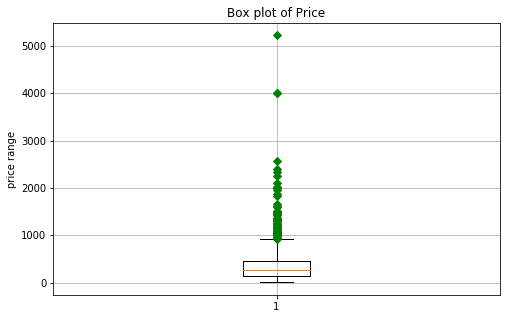

In [39]:
plt.figure(figsize=(8,5))
plt.boxplot(X_test['price'].iloc[a],0,'gD',)
plt.ylabel('price range')
plt.title('Box plot of Price')
plt.grid()

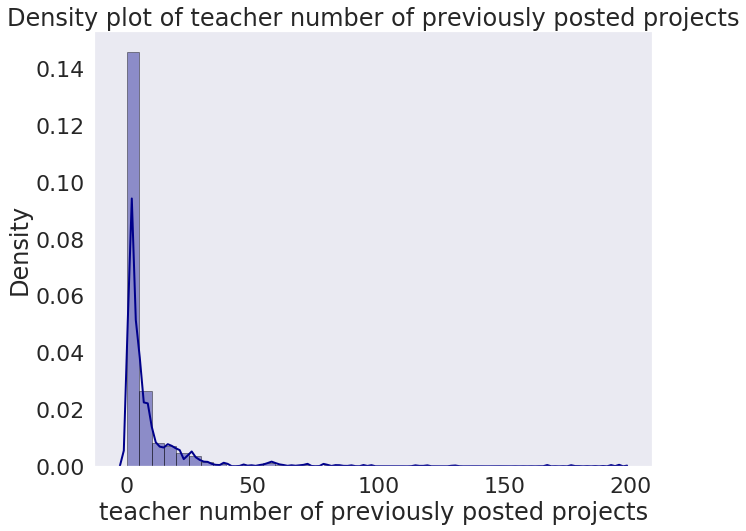

In [66]:
plt.figure(figsize=(10,8))
sns.distplot(X_test['teacher_number_of_previously_posted_projects'].iloc[a], hist=True, kde=True, 
             bins=int(200/5), color = 'darkblue', #each bin is of size 5
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.xlabel('teacher number of previously posted projects')
plt.ylabel('Density')
plt.title('Density plot of teacher number of previously posted projects')
plt.grid()

## Models by adding SentimentIntensityAnalyzer

In [40]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()


# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [41]:
ss_train=[]
for i in tqdm(X_train['essay']):
  ss=sid.polarity_scores(i)
  ss_train.append(ss)

ss_test=[]
for i in tqdm(X_test['essay']):
  ss=sid.polarity_scores(i)
  ss_test.append(ss)

100%|██████████| 8000/8000 [00:14<00:00, 548.55it/s]


In [42]:
s_tr1=[]
s_tr2=[]
s_tr3=[]
for i in tqdm(ss_train):
  s_tr1.append([i['neg']])
  s_tr2.append([i['pos']])
  s_tr3.append([i['neu']])

s_te1=[]
s_te2=[]
s_te3=[]
for i in tqdm(ss_test):
  s_te1.append([i['neg']])
  s_te2.append([i['pos']])
  s_te3.append([i['neu']])

100%|██████████| 8000/8000 [00:00<00:00, 10281.15it/s]


In [43]:
X_tr_tfidf_ss = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade, X_train_price_norm,X_train_previous,X_train_categories ,X_train_state_ohe,s_tr1,s_tr2,s_tr3)).tocsr()
X_te_tfidf_ss = hstack((X_test_essay_tfidf,X_test_title_tfidf,X_test_state_ohe, X_test_teacher_ohe, X_test_grade, X_test_price_norm,X_test_previous,X_test_categories,X_test_state_ohe,s_te1,s_te2,s_te3)).tocsr()

print("Final tfidf Data matrix")
print(X_tr_tfidf_ss.shape, y_train.shape)
print(X_te_tfidf_ss.shape, y_test.shape)
print("="*100)

Final tfidf Data matrix
(32000, 22512) (32000,)
(8000, 22512) (8000,)


In [44]:
#concatinate word to vector  features
X_tr_w2v_ss = hstack((tfidf_essay_w2v_tr,tfidf_title_w2v_tr, X_train_state_ohe, X_train_teacher_ohe, X_train_grade, X_train_price_norm,X_train_previous,X_train_categories ,X_train_state_ohe,s_tr1,s_tr2,s_tr3)).tocsr()
X_te_w2v_ss = hstack((tfidf_essay_w2v_te,tfidf_title_w2v_te, X_test_state_ohe, X_test_teacher_ohe, X_test_grade, X_test_price_norm,X_test_previous,X_test_categories,X_test_state_ohe,s_te1,s_te2,s_te3)).tocsr()
 
 
print("Final w2v Data matrix")
print(X_tr_w2v_ss.shape, y_train.shape)
print(X_te_w2v_ss.shape, y_test.shape)
print("="*100)

Final w2v Data matrix
(32000, 760) (32000,)
(8000, 760) (8000,)


In [45]:
#TfIdf modal
clf_t_ss = GridSearchCV(dt, parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf_t_ss.fit(X_tr_tfidf_ss,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}




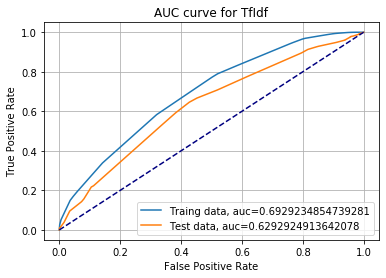

In [56]:
print("Best Hyper parameters: ",clf_t_ss.best_params_)
print('\n')
Tr_pred=[i[1] for i in clf_t_ss.predict_proba(X_tr_tfidf_ss)]
Test_pred=[i[1] for i in clf_t_ss.predict_proba(X_te_tfidf_ss)]

fpr, tpr, _ = metrics.roc_curve(y_train,  Tr_pred)
auc = metrics.roc_auc_score(y_train, Tr_pred)
plt.plot(fpr,tpr,label="Traing data, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  Test_pred)
auc_t_ss = metrics.roc_auc_score(y_test, Test_pred)
plt.plot(fpr,tpr,label="Test data, auc="+str(auc_t_ss))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for TfIdf')
plt.grid()
plt.legend()
plt.show()

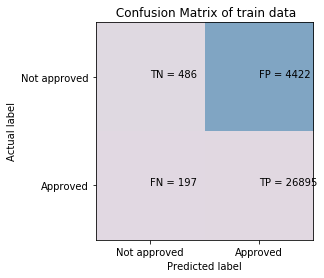

In [47]:
cm = confusion_matrix(y_train,clf_t_ss.predict(X_tr_tfidf_ss))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of train data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

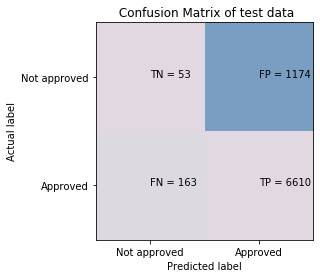

In [48]:
cm = confusion_matrix(y_test,clf_t_ss.predict(X_te_tfidf_ss))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [49]:
#word to vector model
clf_w_ss = GridSearchCV(dt, parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf_w_ss.fit(X_tr_w2v_ss,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                        

Best Hyper parameters:  {'max_depth': 5, 'min_samples_split': 5}




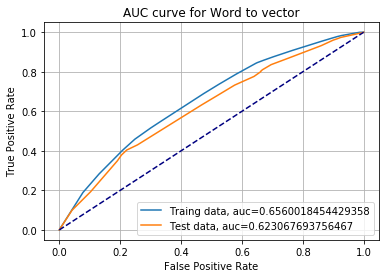

In [55]:
print("Best Hyper parameters: ",clf_w_ss.best_params_)
print('\n')

Tr_pred=[i[1] for i in clf_w_ss.predict_proba(X_tr_w2v_ss)]
Test_pred=[i[1] for i in clf_w_ss.predict_proba(X_te_w2v_ss)]

fpr, tpr, _ = metrics.roc_curve(y_train,  Tr_pred)
auc = metrics.roc_auc_score(y_train, Tr_pred)
plt.plot(fpr,tpr,label="Traing data, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  Test_pred)
auc_w_ss = metrics.roc_auc_score(y_test, Test_pred)
plt.plot(fpr,tpr,label="Test data, auc="+str(auc_w))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for Word to vector')
plt.grid()
plt.legend()
plt.show()

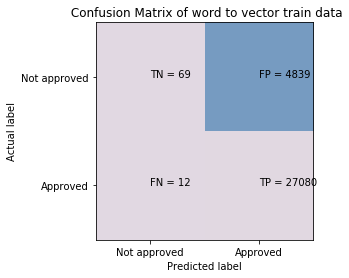

In [51]:
cm = confusion_matrix(y_train,clf_w_ss.predict(X_tr_w2v_ss))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of word to vector train data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

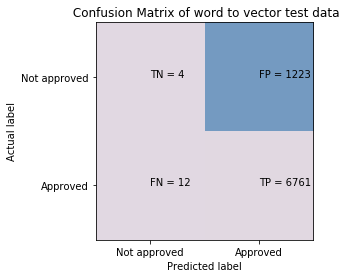

In [52]:
cm = confusion_matrix(y_test,clf_w_ss.predict(X_te_w2v_ss))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.twilight)
classNames = ['Not approved','Approved']
plt.title(' Confusion Matrix of word to vector test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

<h1>2. Summary</h1>

In [53]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["TfIdf", 'clf_t', clf_t.best_params_, round(auc_t,4)])
x.add_row(["TfIdf Word to Vec",'clf_w',clf_w.best_params_, round(auc_w,4)])
 

print(x)

+-------------------+-------+---------------------------------------------+--------+
|     Vectorizer    | Model |               Hyper Parameter               |  AUC   |
+-------------------+-------+---------------------------------------------+--------+
|       TfIdf       | clf_t | {'max_depth': 10, 'min_samples_split': 500} | 0.6301 |
| TfIdf Word to Vec | clf_w |   {'max_depth': 5, 'min_samples_split': 5}  | 0.6231 |
+-------------------+-------+---------------------------------------------+--------+


In [54]:
print('Models after adding Sentiment analyzer vectors')
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["TfIdf_ss", 'clf_t_ss', clf_t_ss.best_params_, round(auc_t_ss,4)])
x.add_row(["TfIdf Word to Vec_ss",'clf_w_ss',clf_w_ss.best_params_, round(auc_w_ss,4)])

print(x)

Models after adding Sentiment analyzer vectors
+----------------------+----------+---------------------------------------------+--------+
|      Vectorizer      |  Model   |               Hyper Parameter               |  AUC   |
+----------------------+----------+---------------------------------------------+--------+
|       TfIdf_ss       | clf_t_ss | {'max_depth': 10, 'min_samples_split': 500} | 0.6293 |
| TfIdf Word to Vec_ss | clf_w_ss |   {'max_depth': 5, 'min_samples_split': 5}  | 0.6217 |
+----------------------+----------+---------------------------------------------+--------+
